## Deconvolve Bars using noncirculant Richardson Lucy

In this notebook we truncate the bars image, such that the bars extend outside the axial border.  The original bar image does not contain any structure near the edges, by cropping it so that the bars extend over the edges we can then test different edge handling schemes. 

## Setup environment

Note the hollow bars test image used in this example was developed by the Biomedical Imaging Group at EPFL and can be found [here](http://bigwww.epfl.ch/deconvolution/bars/).

To run deconvolution examples, we recommend setting up an environment as follows, please post to [Image.sc](https://forum.image.sc/) if you have any issues setting up the environment and/or running the example. 

    conda create --name decon-env python=3.9
    conda activate decon-env
    conda install -c conda-forge jupyterlab
    conda install -c conda-forge pyopencl==2021.2.6 hdbscan numba=0.55.1
    pip install devbio-napari
    
    pip install git+https://github.com/True-North-Intelligent-Algorithms/tnia-python
    pip install --index-url https://test.pypi.org/simple/ --no-deps clij2-fft
    pip install stardist
    
Mac-users please also install this:

    conda install -c conda-forge ocl_icd_wrapper_apple

Linux users please also install this:

    conda install -c conda-forge ocl-icd-system


## Get and open test images

1.  Get the tnia-python-images image collection (TODO: add location)
2.  In the code snippet below change ```im_path``` to the local location on your machine where you put the above folder
3.  Use imread to verify you can open the image, then print the size of the image and verify it is is ```(128,256,256)```


In [1]:
from skimage.io import imread
import numpy as np

ind = np.s_[47:77, :, :]

im_path=r"D:\images\tnia-python-images\deconvolution\bars\\"
im_name='Bars-G10-P15-stack.tif'
psf_name='PSF-Bars-stack.tif'
truth_name='Bars-stack.tif'

im=imread(im_path+im_name)
im=im[ind]

psf=imread(im_path+psf_name)

truth=imread(im_path+truth_name)
im=im.astype('float32')

# normalize the PSF so that PSF energy is 1
psf=psf.astype('float32')
psf=psf/psf.sum()

# We also need to make sure the 'truth' and 'imaged' images have the same sum intensity (for some reason they do not).
truth=truth*(im.sum()/truth.sum())
truth=truth[ind]

print(im.sum())
print(truth.sum())
print(im.shape, psf.shape, truth.shape)

7192386600.0
3596193280.0
(30, 256, 256) (128, 256, 256) (30, 256, 256)


## View 3D Data in notebook

View the data using xy, xz, and zy max projections.  

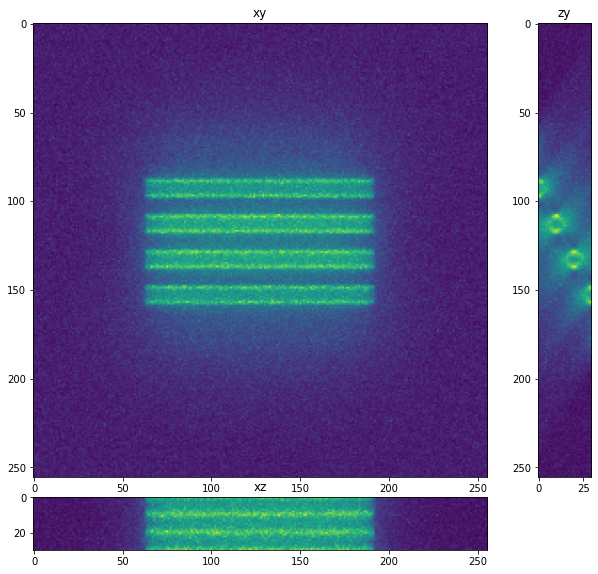

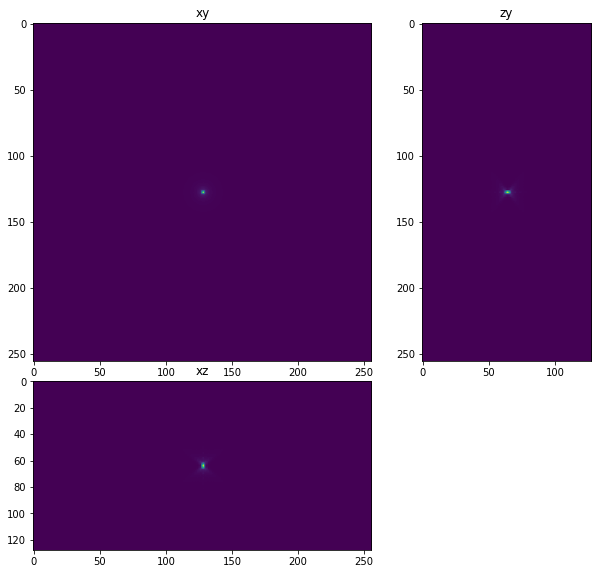

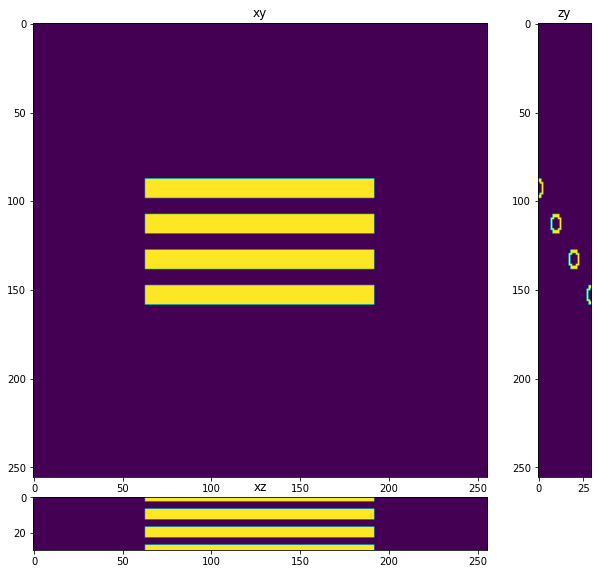

In [2]:
from tnia.plotting.projections import show_xyz_max, show_xyz_slice

fig=show_xyz_max(im)
fig=show_xyz_max(psf)
fig=show_xyz_max(truth)


## Import deconvolution libraries

Try imnporting the clij2 and redlionfish implementations of Richardson Lucy.  If they are found perform a deconvolution with each library

In [4]:
try:
    from clij2fft.richardson_lucy import richardson_lucy_nc, richardson_lucy
    clij2_rl_found=True
    
except ImportError:
    clij2_rl_found=False
try:
    import RedLionfishDeconv as rl
    redlionfish_rl_found=True
except ImportError:
    redlionfish_rl_found=False
    
print('clij2 rl found',clij2_rl_found)
print('redlionfish rl found',redlionfish_rl_found)    

clij2 rl found True
redlionfish rl found True


## Deconvolve and visualize in notebook

get lib
get lib
get lib


Text(0.5, 0.98, 'classical rl 100 iterations rf=0.0002')

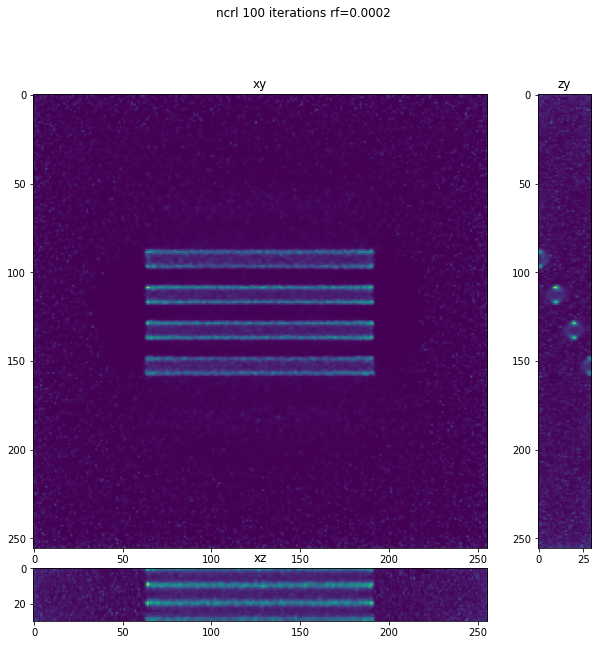

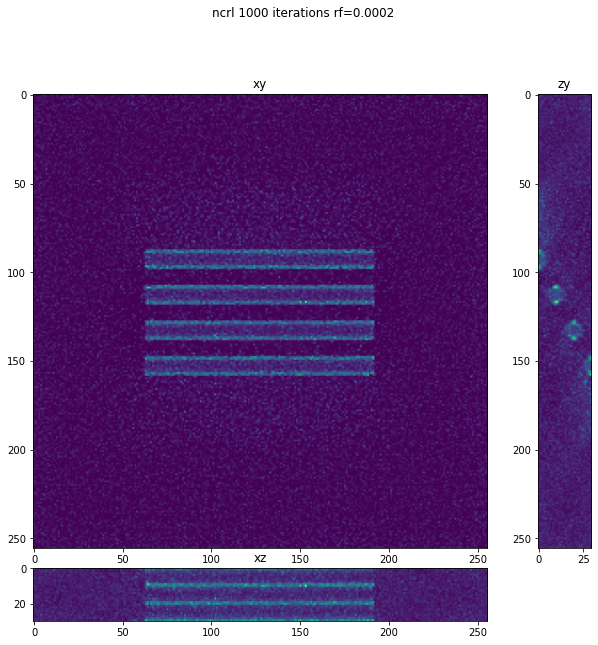

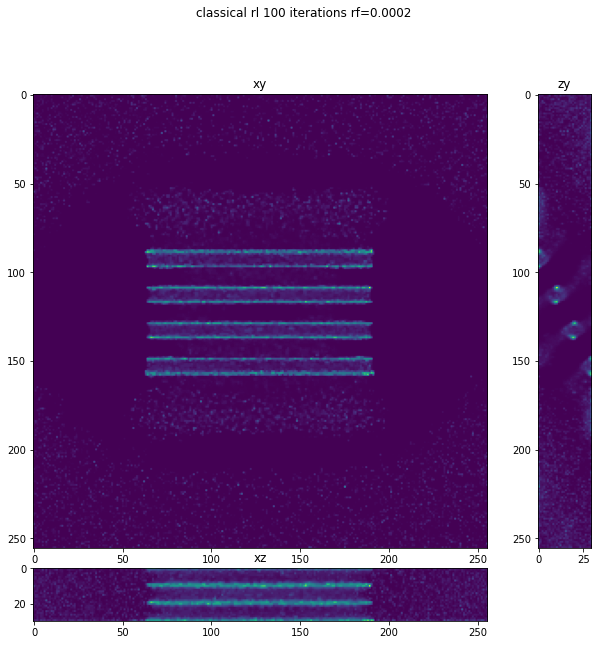

In [7]:
decon100_nc=richardson_lucy_nc(im,psf,100,0.0002)
decon1000_nc=richardson_lucy_nc(im,psf,1000,0.0002)
decon1000=richardson_lucy(im,psf,1000,0.0002)

fig=show_xyz_max(decon100_nc)
fig.suptitle('ncrl 100 iterations rf=0.0002')
fig=show_xyz_max(decon1000_nc)
fig.suptitle('ncrl 1000 iterations rf=0.0002')
fig=show_xyz_max(decon1000)
fig.suptitle('classical rl 100 iterations rf=0.0002')
